In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
xls = pd.ExcelFile('/work/Final_Data_PPE_v2_fz1.xlsx')

df1 = pd.read_excel(xls, 'Bridge_A')

In [ ]:
# Current Ductility Demand is calculated by Rot100CDR / delta_y
df1['Collapse'] = (df1['Ductility Demand'] > 4).astype(int)
df1.head()

,Bridge_No,Record Sequence Number,5-95% Duration (sec),Earthquake Name,Year,Station Name,Magnitude,Mechanism,Rjb (km),Rrup (km),...,delta_y,Ry,Ductility,Period,Vy/W,Rot50CDR,Rot100CDR,Ductility Demand,DI,Collapse
0,1,18553,11.8,"""21273463""",2003,"""Bear Gulch Road""",3.3,Normal Oblique,51.36,51.84,...,0.009604,1.217737e-06,3.553846,1.079948,0.041191,0.000013,0.000016,0.001671,-0.390912,0
1,1,18554,13.6,"""21273463""",2003,"""Black Mountain Los Altos""",3.3,Normal Oblique,35.90,36.58,...,0.009604,6.290907e-07,3.553846,1.079948,0.041191,0.000006,0.000009,0.000910,-0.391210,0
2,1,18555,11.9,"""21273463""",2003,"""El Granada""",3.3,Normal Oblique,62.10,62.50,...,0.009604,4.044441e-07,3.553846,1.079948,0.041191,0.000004,0.000004,0.000442,-0.391393,0
3,1,18556,9.4,"""21273463""",2003,"""Huhtala Ln""",3.3,Normal Oblique,42.34,42.92,...,0.009604,2.017415e-06,3.553846,1.079948,0.041191,0.000013,0.000014,0.001455,-0.390997,0
4,1,18557,12.1,"""21273463""",2003,"""Saint Joseph's Hill""",3.3,Normal Oblique,29.76,30.58,...,0.009604,1.515664e-06,3.553846,1.079948,0.041191,0.000008,0.000011,0.001180,-0.391104,0


In [ ]:
df1.columns = df1.columns.str.lstrip()
df1.columns

Index(['Bridge_No', 'Record Sequence Number', '5-95% Duration (sec)',
       'Earthquake Name', 'Year', 'Station Name', 'Magnitude', 'Mechanism',
       'Rjb (km)', 'Rrup (km)', 'Vs30 (m/sec)', 'EQID', 'Strike (deg)',
       'Dip (deg)', 'Rake Angle (deg)', 'Mechanism', 'Dhyp (km)', 'Ztor (km)',
       'W (km)', 'L (km)', 'A (km)', 'HypD (km)', 'Rx', 'FW/HW Indicator',
       'Z2.5 (km)', 'A1100', 'Region', 'SJ', 'delta_y', 'Ry', 'Ductility',
       'Period', 'Vy/W', 'Rot50CDR', 'Rot100CDR', 'Ductility Demand', 'DI',
       'Collapse'],
      dtype='object')

In [ ]:
df1

,Bridge_No,Record Sequence Number,5-95% Duration (sec),Earthquake Name,Year,Station Name,Magnitude,Mechanism,Rjb (km),Rrup (km),...,delta_y,Ry,Ductility,Period,Vy/W,Rot50CDR,Rot100CDR,Ductility Demand,DI,Collapse
0,1,18553,11.8,"""21273463""",2003,"""Bear Gulch Road""",3.30,Normal Oblique,51.36,51.84,...,0.009604,1.217737e-06,3.553846,1.079948,0.041191,0.000013,0.000016,0.001671,-0.390912,0
1,1,18554,13.6,"""21273463""",2003,"""Black Mountain Los Altos""",3.30,Normal Oblique,35.90,36.58,...,0.009604,6.290907e-07,3.553846,1.079948,0.041191,0.000006,0.000009,0.000910,-0.391210,0
2,1,18555,11.9,"""21273463""",2003,"""El Granada""",3.30,Normal Oblique,62.10,62.50,...,0.009604,4.044441e-07,3.553846,1.079948,0.041191,0.000004,0.000004,0.000442,-0.391393,0
3,1,18556,9.4,"""21273463""",2003,"""Huhtala Ln""",3.30,Normal Oblique,42.34,42.92,...,0.009604,2.017415e-06,3.553846,1.079948,0.041191,0.000013,0.000014,0.001455,-0.390997,0
4,1,18557,12.1,"""21273463""",2003,"""Saint Joseph's Hill""",3.30,Normal Oblique,29.76,30.58,...,0.009604,1.515664e-06,3.553846,1.079948,0.041191,0.000008,0.000011,0.001180,-0.391104,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69715,10,798,16.1,"""Loma Prieta""",1989,"""SF - Telegraph Hill""",6.93,Reverse Oblique,76.40,76.50,...,0.007153,5.702517e-04,6.085000,1.137262,0.056941,0.000006,0.000007,0.000934,-0.196473,0
69716,10,809,9.0,"""Loma Prieta""",1989,"""UCSC""",6.93,Reverse Oblique,12.15,18.51,...,0.007153,1.393407e-03,6.085000,1.137262,0.056941,0.000015,0.000018,0.002483,-0.196169,0
69717,10,972,10.9,"""Northridge-01""",1994,"""Featherly Park - Maint""",6.69,Reverse,82.01,82.32,...,0.007153,5.107859e-04,6.085000,1.137262,0.056941,0.000013,0.000014,0.001974,-0.196269,0
69718,10,982,12.5,"""Northridge-01""",1994,"""Jensen Filter Plant Administrative Building""",6.69,Reverse,0.00,5.43,...,0.007153,1.152709e-02,6.085000,1.137262,0.056941,0.000329,0.000472,0.066017,-0.183674,0


In [ ]:
df2 = df1[df1['Collapse'] == 1]

df2


,Bridge_No,Record Sequence Number,5-95% Duration (sec),Earthquake Name,Year,Station Name,Magnitude,Mechanism,Rjb (km),Rrup (km),...,delta_y,Ry,Ductility,Period,Vy/W,Rot50CDR,Rot100CDR,Ductility Demand,DI,Collapse
1071,1,723,11.0,"""Superstition Hills-02""",1987,"""Parachute Test Site""",6.54,strike slip,0.95,0.95,...,0.009604,0.016249,3.553846,1.079948,0.041191,0.131791,0.179705,18.711486,6.935220,1
1080,1,732,11.8,"""Loma Prieta""",1989,"""APEEL 2 - Redwood City""",6.93,Reverse Oblique,43.06,43.23,...,0.009604,0.019233,3.553846,1.079948,0.041191,0.043442,0.055320,5.760096,1.863893,1
1089,1,741,9.8,"""Loma Prieta""",1989,"""BRAN""",6.93,Reverse Oblique,3.85,10.72,...,0.009604,0.008702,3.553846,1.079948,0.041191,0.035426,0.046848,4.877937,1.518469,1
1100,1,753,7.9,"""Loma Prieta""",1989,"""Corralitos""",6.93,Reverse Oblique,0.16,3.85,...,0.009604,0.008045,3.553846,1.079948,0.041191,0.037136,0.045593,4.747275,1.467306,1
1106,1,759,23.1,"""Loma Prieta""",1989,"""Foster City - APEEL 1""",6.93,Reverse Oblique,43.77,43.94,...,0.009604,0.010247,3.553846,1.079948,0.041191,0.032429,0.045915,4.780842,1.480450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65373,10,182,6.8,"""Imperial Valley-06""",1979,"""El Centro Array #7""",6.53,strike slip,0.56,0.56,...,0.007153,0.004860,6.085000,1.137262,0.056941,0.027798,0.038104,5.326873,0.850909,1
65424,10,319,6.9,"""Westmorland""",1981,"""Westmorland Fire Sta""",5.90,strike slip,6.18,6.50,...,0.007153,0.004578,6.085000,1.137262,0.056941,0.023466,0.041832,5.848173,0.953426,1
65441,10,338,13.2,"""Coalinga-01""",1983,"""Parkfield - Fault Zone 14""",6.36,Reverse,28.11,29.48,...,0.007153,0.007277,6.085000,1.137262,0.056941,0.021330,0.032473,4.539788,0.696124,1
65476,10,451,4.1,"""Morgan Hill""",1984,"""Coyote Lake Dam - Southwest Abutment""",6.19,strike slip,0.18,0.53,...,0.007153,0.005470,6.085000,1.137262,0.056941,0.028284,0.043618,6.097760,1.002509,1


In [ ]:
nan_counts = df1.isna().sum()
print(nan_counts)

Bridge_No                     0
Record Sequence Number        0
5-95% Duration (sec)         30
Earthquake Name               0
Year                          0
Station Name                  0
Magnitude                     0
Mechanism                     0
Rjb (km)                      0
Rrup (km)                     0
Vs30 (m/sec)                  0
EQID                          0
Strike (deg)                  0
Dip (deg)                     0
Rake Angle (deg)              0
Mechanism                     0
Dhyp (km)                     0
Ztor (km)                     0
W (km)                        0
L (km)                        0
A (km)                        0
HypD (km)                     0
Rx                            0
FW/HW Indicator           19320
Z2.5 (km)                     0
A1100                       250
Region                        0
SJ                            0
delta_y                       0
Ry                            0
Ductility                     0
Period  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight

import numpy as np
# Define the feature columns and target variable
# Removed the NaN values just to make a straightforward model 
feature_columns = [
       ' Earthquake Name', ' Year', ' Station Name', ' Magnitude',
       ' Mechanism', ' Rjb (km)', ' Rrup (km)', ' Vs30 (m/sec)', 'EQID',
       'Strike (deg)', 'Dip (deg)', 'Rake Angle (deg)', 'Mechanism',
       'Dhyp (km)', 'Ztor (km)', 'W (km)', 'L (km)', 'A (km)', 'HypD (km)',
       'Rx', 'Z2.5 (km)', 'Region', 'SJ',
       'Ry', 'Ductility', 'Period', 'Vy/W']
target_column = 'Collapse'

# Extract features and target variable
X = df1[feature_columns]
y = df1[target_column]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# Calculate class weights
total_samples = len(y_train)
collapse_samples = np.sum(y_train == 1)
non_collapse_samples = total_samples - collapse_samples

# Set higher weight for class 1 (collapse) and lower weight for class 0 (non-collapse)
weight_for_collapse = total_samples / (2 * collapse_samples)
weight_for_non_collapse = total_samples / (2 * non_collapse_samples)

class_weights = {0: weight_for_non_collapse, 1: weight_for_collapse}



# Train a Random Forest classifier
# model = RandomForestClassifier(random_state=42)
# model = RandomForestClassifier(random_state=42, class_weight=dict(enumerate(class_weights)))
model = RandomForestClassifier(random_state=42, class_weight=class_weights)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("RFC Accuracy:", accuracy)

# Get feature importances
feature_importance = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top features
print(feature_importance_df.head())


RFC Accuracy: 0.993689041881813
       Feature  Importance
20          Ry    0.132620
13      L (km)    0.080467
14      A (km)    0.080184
1    Magnitude    0.068402
3    Rrup (km)    0.061118


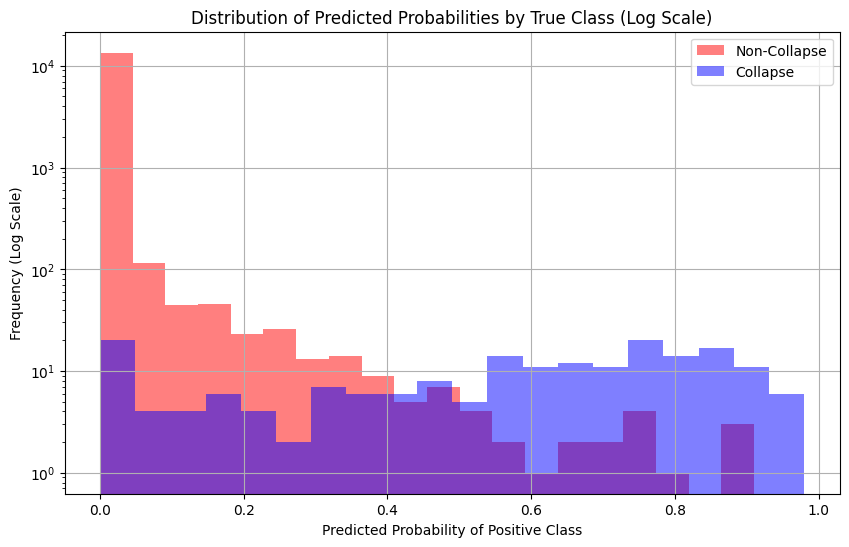

In [ ]:
import matplotlib.pyplot as plt

# Assuming binary classification, extract probabilities for the positive class
positive_class_probabilities = y_prob[:, 1]  # Adjust index if necessary

# Create a DataFrame for easier plotting
import pandas as pd
df = pd.DataFrame({'Probability': positive_class_probabilities, 'TrueClass': y_test})

# Plot histograms
plt.figure(figsize=(10, 6))

# Plot for class 0
plt.hist(df[df['TrueClass'] == 0]['Probability'], bins=20, color='red', alpha=0.5, label='Non-Collapse', log=True)

# Plot for class 1
plt.hist(df[df['TrueClass'] == 1]['Probability'], bins=20, color='blue', alpha=0.5, label='Collapse', log=True)

plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Frequency (Log Scale)')
plt.title('Distribution of Predicted Probabilities by True Class (Log Scale)')
plt.legend()
plt.grid(True)
plt.show()


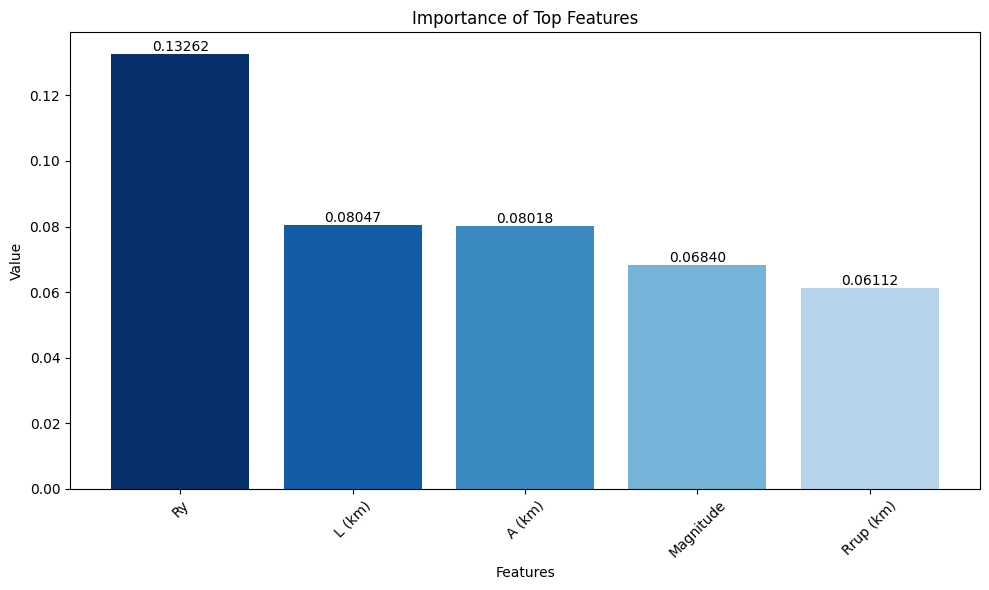

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the features and their values
features = ['Ry', 'L (km)', 'A (km)', 'Magnitude', 'Rrup (km)']
values = [0.132620, 0.080467, 0.080184, 0.068402, 0.061118]

colors = plt.cm.Blues(np.linspace(1, 0.3, len(features)))

# Plotting the bar plot with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(features, values, color=colors)

for bar, value in zip(bars, values):
    text_va = 'bottom'
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.5f}', ha='center', va=text_va, fontsize=10)

plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Importance of Top Features')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Detailed classification report
report = classification_report(y_test, y_pred)
print("RFC Classification Report:\n", report)

print()
print('--------------------------------------------------------')
print()

# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual 0', 'Actual 1'], 
                              columns=['Predicted 0', 'Predicted 1'])

# Print the confusion matrix DataFrame
print("Confusion Matrix:")
print(conf_matrix_df)

# TODO: Fine tune to increase accuracy for collapse cases at expense of non-collapse accuracy

RFC Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13756
           1       0.86      0.63      0.73       188

    accuracy                           0.99     13944
   macro avg       0.93      0.82      0.86     13944
weighted avg       0.99      0.99      0.99     13944


--------------------------------------------------------

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        13737           19
Actual 1           69          119


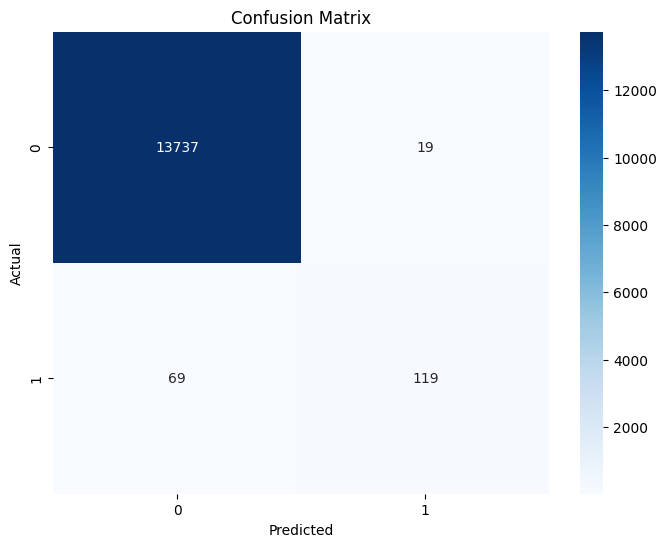

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=0.001, 
                    hidden_layer_sizes=(5, 2), random_state=52).fit(X_train, y_train)
nn_y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, nn_y_pred)
print("LR Accuracy:", accuracy)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
LR Accuracy: 0.9864457831325302


In [ ]:
# Detailed classification report
report = classification_report(y_test, nn_y_pred)
print("Classification Report:\n", report)

print()
print('--------------------------------------------------------')
print()

# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_test, nn_y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual 0', 'Actual 1'], 
                              columns=['Predicted 0', 'Predicted 1'])

# Print the confusion matrix DataFrame
print("Confusion Matrix:")
print(conf_matrix_df)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     13756
           1       0.47      0.04      0.07       188

    accuracy                           0.99     13944
   macro avg       0.73      0.52      0.53     13944
weighted avg       0.98      0.99      0.98     13944


--------------------------------------------------------

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        13748            8
Actual 1          181            7


In [ ]:
print(df1.shape)
#print(df1_cleaned.shape)

(69720, 38)


In [ ]:
df_collapsed = df1[df1['Collapse']==1]
df_collapsed

,Bridge_No,Record Sequence Number,5-95% Duration (sec),Earthquake Name,Year,Station Name,Magnitude,Mechanism,Rjb (km),Rrup (km),...,delta_y,Ry,Ductility,Period,Vy/W,Rot50CDR,Rot100CDR,Ductility Demand,DI,Collapse
1071,1,723,11.0,"""Superstition Hills-02""",1987,"""Parachute Test Site""",6.54,strike slip,0.95,0.95,...,0.009604,0.016249,3.553846,1.079948,0.041191,0.131791,0.179705,18.711486,6.935220,1
1080,1,732,11.8,"""Loma Prieta""",1989,"""APEEL 2 - Redwood City""",6.93,Reverse Oblique,43.06,43.23,...,0.009604,0.019233,3.553846,1.079948,0.041191,0.043442,0.055320,5.760096,1.863893,1
1089,1,741,9.8,"""Loma Prieta""",1989,"""BRAN""",6.93,Reverse Oblique,3.85,10.72,...,0.009604,0.008702,3.553846,1.079948,0.041191,0.035426,0.046848,4.877937,1.518469,1
1100,1,753,7.9,"""Loma Prieta""",1989,"""Corralitos""",6.93,Reverse Oblique,0.16,3.85,...,0.009604,0.008045,3.553846,1.079948,0.041191,0.037136,0.045593,4.747275,1.467306,1
1106,1,759,23.1,"""Loma Prieta""",1989,"""Foster City - APEEL 1""",6.93,Reverse Oblique,43.77,43.94,...,0.009604,0.010247,3.553846,1.079948,0.041191,0.032429,0.045915,4.780842,1.480450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65373,10,182,6.8,"""Imperial Valley-06""",1979,"""El Centro Array #7""",6.53,strike slip,0.56,0.56,...,0.007153,0.004860,6.085000,1.137262,0.056941,0.027798,0.038104,5.326873,0.850909,1
65424,10,319,6.9,"""Westmorland""",1981,"""Westmorland Fire Sta""",5.90,strike slip,6.18,6.50,...,0.007153,0.004578,6.085000,1.137262,0.056941,0.023466,0.041832,5.848173,0.953426,1
65441,10,338,13.2,"""Coalinga-01""",1983,"""Parkfield - Fault Zone 14""",6.36,Reverse,28.11,29.48,...,0.007153,0.007277,6.085000,1.137262,0.056941,0.021330,0.032473,4.539788,0.696124,1
65476,10,451,4.1,"""Morgan Hill""",1984,"""Coyote Lake Dam - Southwest Abutment""",6.19,strike slip,0.18,0.53,...,0.007153,0.005470,6.085000,1.137262,0.056941,0.028284,0.043618,6.097760,1.002509,1


In [ ]:
print(df1['Collapse'].value_counts())

Collapse
0    68821
1      899
Name: count, dtype: int64


In [ ]:
# Regression Results
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

feature_columns = [
       ' Earthquake Name', ' Year', ' Station Name', ' Magnitude',
       ' Mechanism', ' Rjb (km)', ' Rrup (km)', ' Vs30 (m/sec)', 'EQID',
       'Strike (deg)', 'Dip (deg)', 'Rake Angle (deg)', 'Mechanism',
       'Dhyp (km)', 'Ztor (km)', 'W (km)', 'L (km)', 'A (km)', 'HypD (km)',
       'Rx', 'Z2.5 (km)', 'Region', 'SJ',
       'Ry', 'Ductility', 'Period', 'Vy/W']

       # Remove period
target_column = 'Ductility Demand'

# Extract features and target variable
X = df1[feature_columns]
y = df1[target_column]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier with class weights
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# Calculate the Mean Squared Error and then Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.6529392816228117


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train

,Magnitude,Mechanism,Rjb (km),Rrup (km),Vs30 (m/sec),Strike (deg),Dip (deg),Rake Angle (deg),Dhyp (km),Ztor (km),...,Region,SJ,Ry,Vy/W,Ductility,Mechanism_ Normal,Mechanism_ Normal Oblique,Mechanism_ Reverse,Mechanism_ Reverse Oblique,Mechanism_ strike slip
29822,6.61,0,0.83,0.97,310.21,330.0,90.0,0,12.500,0.5000,...,10,1,4.059538e-03,0.045102,3.921824,False,False,False,False,True
12709,3.59,3,32.91,33.96,668.72,132.0,83.0,146,8.884,8.3899,...,1,0,1.684713e-06,0.230336,4.739003,False,False,False,True,False
42706,3.70,0,49.43,49.88,462.66,140.0,51.0,171,6.973,6.4921,...,1,0,1.521758e-06,0.041808,1.072464,False,False,False,False,True
6956,7.28,0,135.88,135.88,290.63,336.0,90.0,180,7.000,0.0000,...,1,0,1.946116e-03,0.041191,3.553846,False,False,False,False,True
1793,4.90,0,48.67,49.45,286.60,301.8,84.0,-177,10.120,7.8650,...,1,0,9.225610e-05,0.041191,3.553846,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,6.90,2,29.37,29.38,276.30,209.0,40.0,104,6.500,0.7100,...,10,1,1.225955e-03,0.173619,5.263158,False,False,True,False,False
6265,3.73,0,58.24,60.32,559.00,311.0,81.0,-167,16.276,15.7054,...,1,0,6.485121e-07,0.041191,3.553846,False,False,False,False,True
54886,3.50,0,14.38,14.49,361.42,332.0,86.0,-152,2.386,1.8423,...,1,0,6.693294e-06,0.107332,7.969543,False,False,False,False,True
860,4.30,0,13.38,13.62,600.00,358.0,78.0,-155,3.361,2.5850,...,1,0,6.461695e-05,0.041191,3.553846,False,False,False,False,True


In [ ]:
import pandas as pd
from statsmodels.regression.mixed_linear_model import MixedLM
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming df1 is your DataFrame containing the data
feature_columns = [
    'EQID', 'Year', 'Station Name', 'Magnitude',
    'Mechanism', 'Rjb (km)', 'Rrup (km)', 'Vs30 (m/sec)',
    'Strike (deg)', 'Dip (deg)', 'Rake Angle (deg)', 'Dhyp (km)', 'Ztor (km)',
    'W (km)', 'L (km)', 'A (km)', 'HypD (km)', 'Rx', 'Z2.5 (km)', 'Region', 'SJ',
    'Ry', 'Vy/W', 'Ductility'
]

target_column = 'Ductility Demand'

# Extract features and target variable
X = df1[feature_columns]
y = df1[target_column]

# Rename the 'Vy/W' column to 'Vy_W' to avoid special character issues
X = X.rename(columns={'Vy/W': 'Vy_W'})

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define the mixed-effects model formula
# Use the Q function properly to handle special characters
from patsy import dmatrix

formula = 'Q("Ductility Demand") ~ Magnitude + Q("Rjb (km)") + Q("Rrup (km)") + Q("Vs30 (m/sec)") + Q("Strike (deg)") + Q("Dip (deg)") + Q("Rake Angle (deg)") + Q("Dhyp (km)") + Q("Ztor (km)") + Q("W (km)") + Q("L (km)") + Q("A (km)") + Q("HypD (km)") + Rx + Q("Z2.5 (km)") + Ry + Vy_W + Ductility'

# Fit the model with mixed effects (random intercept for 'EQID' and random slopes for 'Vy_W' and 'Ductility')
md = MixedLM.from_formula(formula, data=X_train.join(y_train), groups=X_train['EQID'], re_formula="~ Vy_W + Ductility")
mdf = md.fit()
print(mdf.summary())

# Predict on the test set
X_test['Ductility_Demand'] = y_test
pred = mdf.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)


/root/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/root/venv/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/root/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/root/venv/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/root/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/roo

In [ ]:
import pandas as pd
from statsmodels.regression.mixed_linear_model import MixedLM
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from patsy import dmatrix

# Assuming df1 is your DataFrame containing the data
feature_columns = [
    'EQID', ' Year', ' Station Name', ' Magnitude',
    ' Mechanism', ' Rjb (km)', ' Rrup (km)', ' Vs30 (m/sec)',
    'Strike (deg)', 'Dip (deg)', 'Rake Angle (deg)', 'Dhyp (km)', 'Ztor (km)',
    'W (km)', 'L (km)', 'A (km)', 'HypD (km)', 'Rx', 'Z2.5 (km)', 'Region', 'SJ',
    'Ry', 'Vy/W', 'Ductility'
]

target_column = 'Ductility Demand'

# Extract features and target variable
X = df1[feature_columns]
y = df1[target_column]

# Rename the 'Vy/W' column to 'Vy_W' to avoid special character issues
X = X.rename(columns={'Vy/W': 'Vy_W'})

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define the mixed-effects model formula
formula = 'Q("Ductility Demand") ~ Magnitude + Q("Rjb (km)") + Q("Rrup (km)") + Q("Vs30 (m/sec)") + Q("Strike (deg)") + Q("Dip (deg)") + Q("Rake Angle (deg)") + Q("Dhyp (km)") + Q("Ztor (km)") + Q("W (km)") + Q("L (km)") + Q("A (km)") + Q("HypD (km)") + Rx + Q("Z2.5 (km)") + Ry + Vy_W + Ductility'

# Fit the model with random intercept for 'EQID'
md1 = MixedLM.from_formula(formula, data=X_train.join(y_train), groups=X_train['EQID'])
mdf1 = md1.fit()
print("Random intercept model summary:")
print(mdf1.summary())

# Fit the model with random slopes for 'Vy_W' and 'Ductility'
md2 = MixedLM.from_formula(formula, data=X_train.join(y_train), groups=X_train['EQID'], re_formula="~ Vy_W + Ductility")
mdf2 = md2.fit()
print("Random slopes model summary:")
print(mdf2.summary())

# Fit the model with a different random effect structure, e.g., random slope for 'Ry'
md3 = MixedLM.from_formula(formula, data=X_train.join(y_train), groups=X_train['EQID'], re_formula="~ Ry")
mdf3 = md3.fit()
print("Alternative random effect structure model summary:")
print(mdf3.summary())

# Evaluate models
X_test['Ductility_Demand'] = y_test

pred1 = mdf1.predict(X_test)
mse1 = mean_squared_error(y_test, pred1)
rmse1 = mse1 ** 0.5
print("RMSE for random intercept model:", rmse1)

pred2 = mdf2.predict(X_test)
mse2 = mean_squared_error(y_test, pred2)
rmse2 = mse2 ** 0.5
print("RMSE for random slopes model:", rmse2)

pred3 = mdf3.predict(X_test)
mse3 = mean_squared_error(y_test, pred3)
rmse3 = mse3 ** 0.5
print("RMSE for alternative random effect structure model:", rmse3)

NameError: name 'df1' is not defined

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming 'df1' and 'feature_columns' are predefined correctly
# Also assuming 'Ductility Demand' exists in your df1 and you want to log-transform it

# Step 1: Prepare the dataset
df1['log_Ductility_Demand'] = np.log(df1['Ductility Demand'] + 1)  # Adding 1 to avoid log(0)

# Step 3: Create a formula for the regression model
formula = 'log_Ductility_Demand ~ ' + ' + '.join(feature_columns)

# Step 4: Fit the model
model = smf.ols(formula, data=df1).fit()
print(model.summary())

# Step 5: Check for heteroscedasticity
test, pval, _, f_pval = het_breuschpagan(model.resid, model.model.exog)
print('Breusch-Pagan p-value:', pval)

# Step 6: Use robust standard errors if heteroscedasticity is present
if pval < 0.05:  # Heteroscedasticity exists, use robust standard errors
    robust_model = model.get_robustcov_results()
    print(robust_model.summary())


SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
# Regression Results
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Assuming df1 is your DataFrame
# Apply log transformation to the target variable and selected features
df1['log_Ductility_Demand'] = np.log(df1['Ductility Demand'] + 0.1)

# Apply log transformation to numeric features
numeric_features = [' Magnitude', ' Vs30 (m/sec)', 'Dhyp (km)', 'Ry', 'Period', 'Vy/W']
for feature in numeric_features:
    df1['log_' + feature] = np.log(df1[feature] + 0.1)

# Update feature columns list to include the transformed feature names
feature_columns = [
    'log_ Magnitude', 'log_ Vs30 (m/sec)',
    'Strike (deg)', 'Dip (deg)', 'Rake Angle (deg)', 'Mechanism',
    'log_Dhyp (km)', 'log_Rx', 'log_Z2.5 (km)', 'Region', 'SJ',
    'log_Ry', 'Ductility', 'log_Period', 'log_Vy/W'
]

# Add a small constant to avoid log(0) or log(negative)
constant = 0.1
df1['Rx'] = df1['Rx'].apply(lambda x: x + constant if x <= 0 else x)
df1['Z2.5 (km)'] = df1['Z2.5 (km)'].apply(lambda x: x + constant if x <= 0 else x)

# Now apply the log transformation
df1['log_Rx'] = np.log(df1['Rx'])
df1['log_Z2.5 (km)'] = np.log(df1['Z2.5 (km)'])

# Extract features and transformed target variable
X = df1[feature_columns]
y = df1['log_Ductility_Demand']

# One-hot encode categorical features that are not numeric
X_encoded = pd.get_dummies(X)

# Add a constant to the model (required for statsmodels)
X_encoded = sm.add_constant(X_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Assuming X_train and y_train are already defined
# Check for infinities or NaN values in both X_train and y_train
if np.any(np.isnan(X_train)) or np.any(np.isnan(y_train)) or np.any(np.isinf(X_train)) or np.any(np.isinf(y_train)):
    print("NaN or Inf values found")

    # Remove rows with NaN or Inf in X_train
    X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
    y_train = y_train[X_train.index]  # Align y_train to X_train's index before dropping NaNs
    X_train.dropna(inplace=True)

    # Since we've modified X_train, ensure y_train is also aligned
    y_train = y_train[X_train.index]
    y_train.dropna(inplace=True)  # Make sure no NaNs in y_train

    # Now check and make sure indices are aligned
    print("Indices aligned:", X_train.index.equals(y_train.index))

# Fitting a GLS model
gls_model = sm.GLS(y_train, X_train).fit()

# Print the summary of the model
print(gls_model.summary())


NaN or Inf values found
Indices aligned: True
                             GLS Regression Results                             
Dep. Variable:     log_Ductility_Demand   R-squared:                       0.767
Model:                              GLS   Adj. R-squared:                  0.767
Method:                   Least Squares   F-statistic:                     6093.
Date:                  Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                          03:47:17   Log-Likelihood:                -15135.
No. Observations:                 25885   AIC:                         3.030e+04
Df Residuals:                     25870   BIC:                         3.042e+04
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [ ]:
# Assuming X_test is a DataFrame
for column in X_test.columns:
    if X_test[column].isnull().any():  # Correct usage
        print(f"Column {column} has NaN values.")
        # Handle NaN values, for example, by filling them
        median_value = X_train[column].median()  # Assuming X_train is defined
        X_test[column].fillna(median_value, inplace=True)


# If the constant was added to X_train, ensure it is also added to X_test
if 'const' not in X_test.columns:
    X_test = sm.add_constant(X_test, has_constant='add')

# Predicting using the GLS model
y_pred = gls_model.predict(X_test)

# Calculate the Mean Squared Error and then Root Mean Squared Error
mse = mean_squared_error(np.exp(y_test) - 1, np.exp(y_pred) - 1)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)


Column log_Rx has NaN values.
Column log_Z2.5 (km) has NaN values.


ValueError: Input contains infinity or a value too large for dtype('float64').

In [ ]:
# Check if there are any inf values in predictions
inf_indices = np.isinf(y_pred)
if np.any(inf_indices):
    print("Infinite predictions found at indices:", np.where(inf_indices))


# Checking before log transformation
for column in ['Rx', 'Z2.5 (km)']:  # Add other columns as needed
    if (df1[column] <= 0).any():
        print(f"Invalid values in {column} before transformation")

# Infinite predictions indices
infinite_indices = np.array([2158, 4412, 6095])

# Identify indices with infinite predictions directly
infinite_pred_indices = np.where(np.isinf(y_pred))[0]

# Drop rows from X_test and y_test using these indices
# Note: Make sure 'y_pred' aligns with 'X_test' and 'y_test'
X_test_filtered = X_test.drop(X_test.index[infinite_pred_indices])
y_test_filtered = y_test.drop(y_test.index[infinite_pred_indices])
y_pred_filtered = np.delete(y_pred, infinite_indices)

print("Filtered X_test shape:", X_test_filtered.shape)
print("Filtered y_test shape:", y_test_filtered.shape)


Infinite predictions found at indices: (array([2158, 4412, 6095]),)
Invalid values in Rx before transformation
Invalid values in Z2.5 (km) before transformation
Filtered X_test shape: (13941, 16)
Filtered y_test shape: (13941,)


In [ ]:
# Calculate the Mean Squared Error and then Root Mean Squared Error
mse = mean_squared_error(y_test_filtered, y_pred_filtered)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.7734941519873609


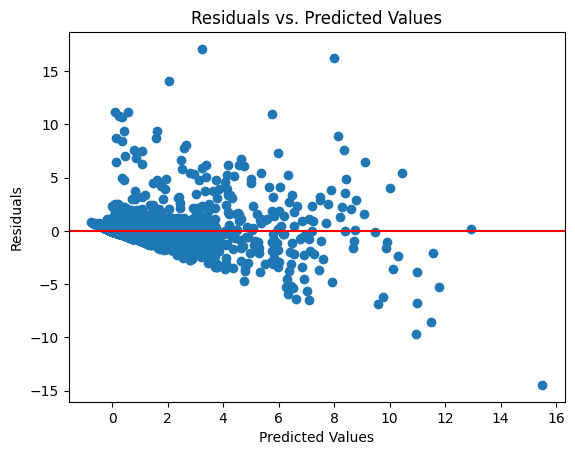

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


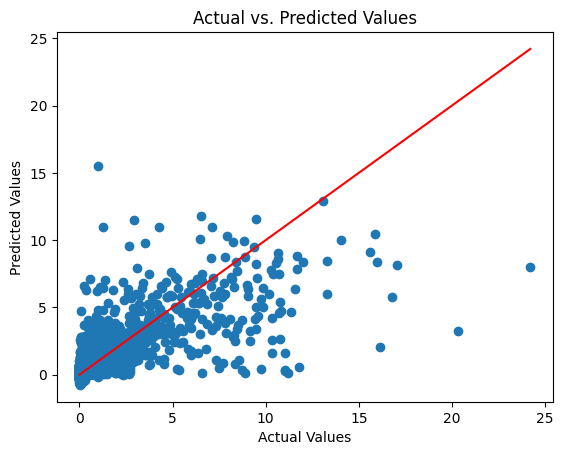

In [ ]:
plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()


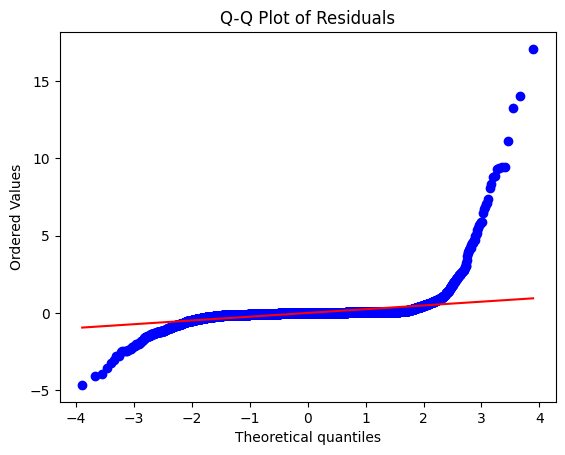

In [ ]:
import scipy.stats as stats

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(X_encoded.values, i) for i in range(X_encoded.shape[1])]

print(vif_data.sort_values('VIF', ascending=False))


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('mlp', MLPClassifier(max_iter=100))
])

parameter_space = {
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.001, 0.01],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__hidden_layer_sizes': [(50,), (100,)],
    'mlp__learning_rate_init': [0.001, 0.01]
}

grid_search = GridSearchCV(pipeline, parameter_space, n_jobs=-1, cv=5)
grid_search.fit(X_train, y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/shared-libs/python3.9/py/li

KernelInterrupted: Execution interrupted by the Jupyter kernel.

### Exploratory Data Analysis

In [ ]:
# Summary Statistics
rfc_eda = ['W (km)', ' Rjb (km)', 'A (km)', ' Magnitude', 'Rot50CDR', 'Ry', 'L (km)', 'Ductility Demand']

column_summaries = []

for column_name in rfc_eda:
    column_summary = df1[column_name].describe().to_frame()
    column_summaries.append(column_summary)

combined_summary = pd.concat(column_summaries, axis=1)
print(combined_summary)

                W (km)         Rjb (km)           A (km)        Magnitude  \
count 69720.0000000000 69720.0000000000 69720.0000000000 69720.0000000000   
mean      5.4151319564    40.8911388411   225.1858864028     4.6792606139   
std       8.5448683746    21.7747085171   635.8472110050     1.2465398380   
min       0.3000000000     0.0000000000     0.2000000000     3.0500000000   
25%       0.9000000000    23.0275000000     0.9000000000     3.7100000000   
50%       1.5000000000    40.4850000000     2.1000000000     4.2000000000   
75%       4.6000000000    58.5525000000    29.0000000000     5.3900000000   
max      70.4000000000   164.3600000000  5304.9000000000     7.9000000000   

              Rot50CDR               Ry           L (km)  Ductility Demand  
count 69720.0000000000 69720.0000000000 69720.0000000000  69720.0000000000  
mean      0.0018122834     0.0003909310    11.2093130431      0.2871656675  
std       0.0063701220     0.0014145183    24.2588503523      1.0584950366 

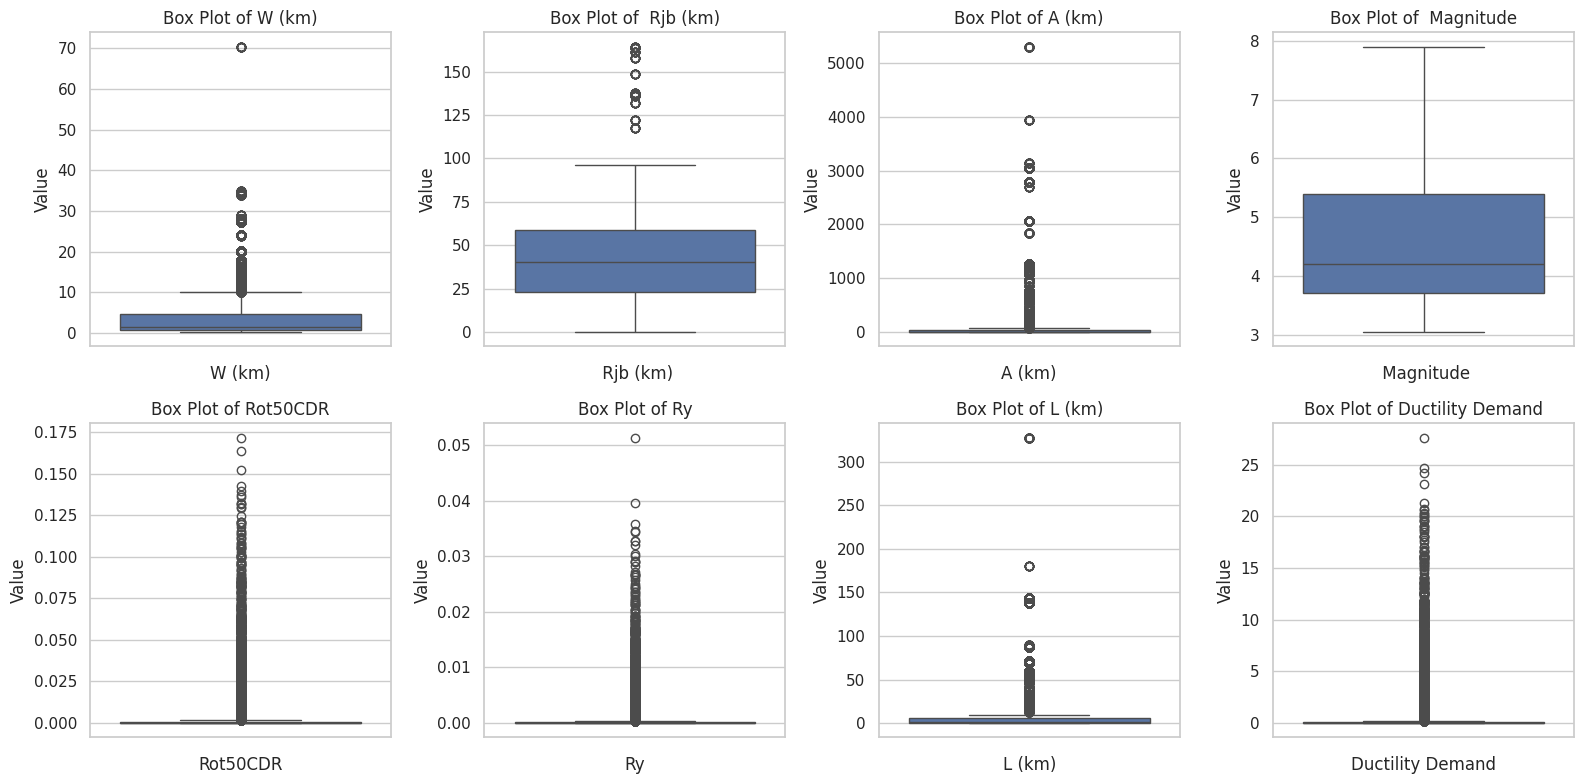

In [ ]:
# Box Plots
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns for subplots
rfc_eda = ['W (km)', ' Rjb (km)', 'A (km)', ' Magnitude', 'Rot50CDR', 'Ry', 'L (km)', 'Ductility Demand']

# Set the style of the plot
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each column and create a box plot
for i, column in enumerate(rfc_eda):
    sns.boxplot(data=df1[column], ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Box Plot of {column}')

# Remove any extra subplots if the number of columns is less than 8
for j in range(len(rfc_eda), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

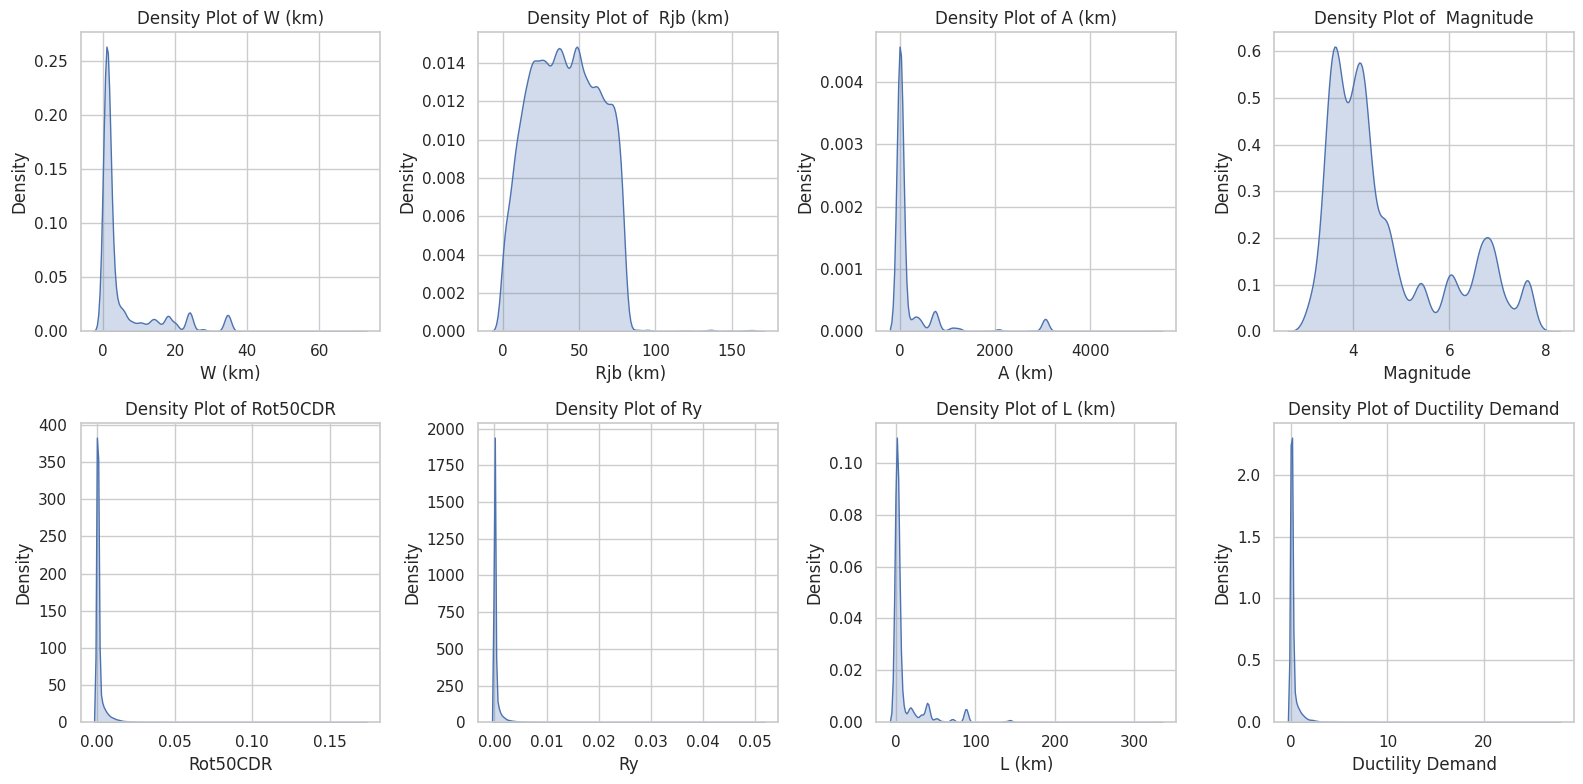

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns for subplots
rfc_eda = ['W (km)', ' Rjb (km)', 'A (km)', ' Magnitude', 'Rot50CDR', 'Ry', 'L (km)', 'Ductility Demand']

# Set the style of the plot
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each column and create a density plot
for i, column in enumerate(rfc_eda):
    sns.kdeplot(data=df1[column], fill=True, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Density Plot of {column}')

# Remove any extra subplots if the number of columns is less than 8
for j in range(len(rfc_eda), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Scatter Plots

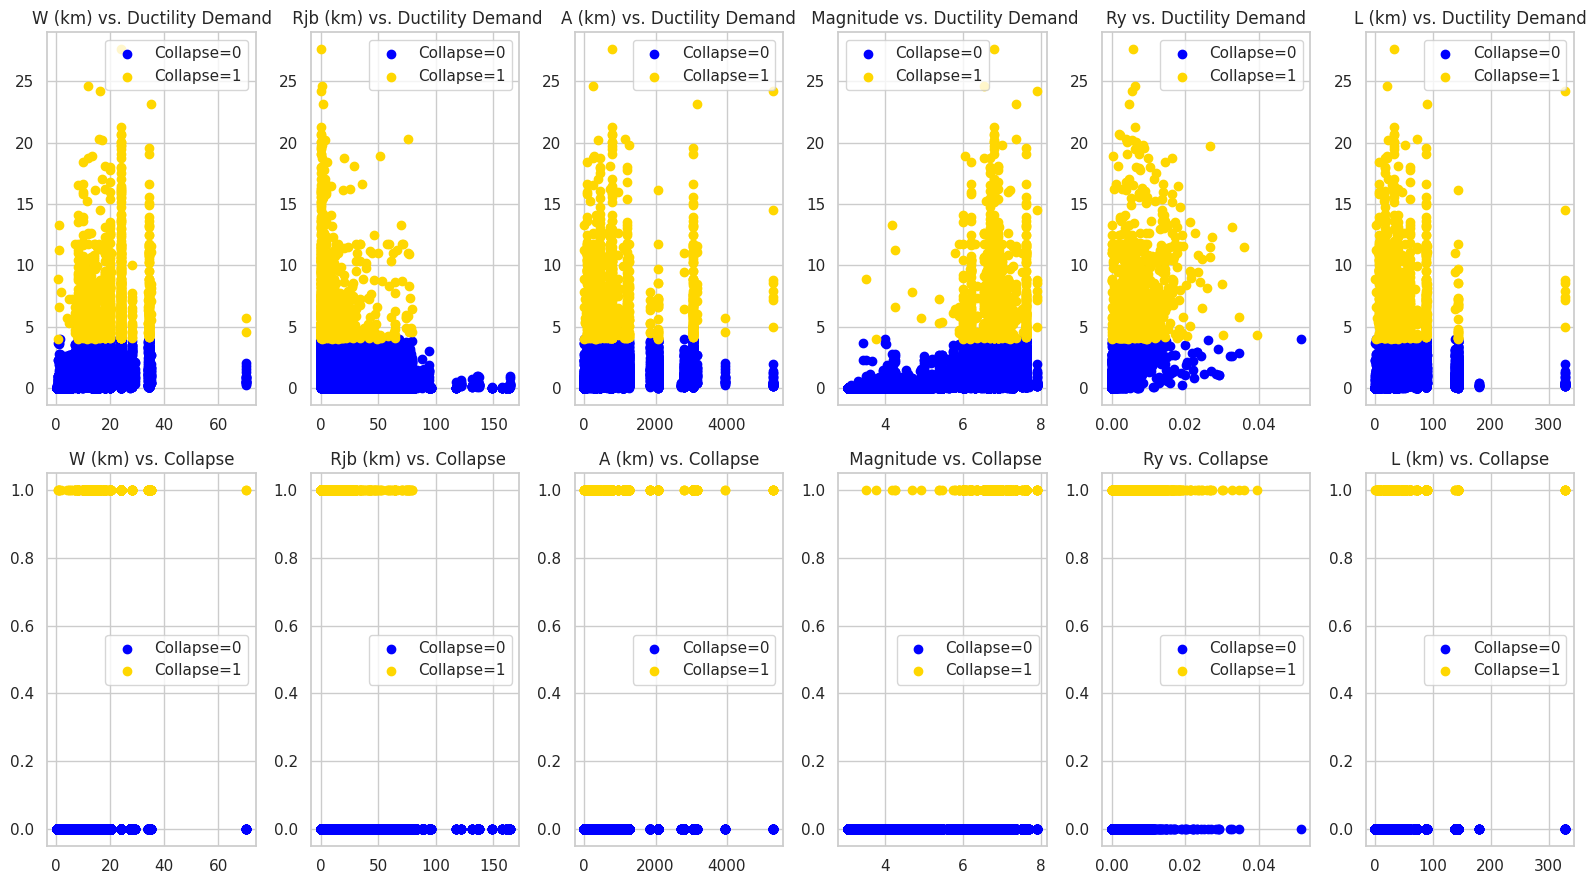

In [ ]:
# Independent variables
x_vars = ['W (km)', ' Rjb (km)', 'A (km)', ' Magnitude', 'Ry', 'L (km)']

# Dependent variables
y_vars = ['Ductility Demand', 'Collapse']

# Create a figure with subplots
num_dependent_vars = len(y_vars)
fig, axes = plt.subplots(num_dependent_vars, len(x_vars), figsize=(16, 9))

# Define colors for collapse values 0 and 1
colors = {0: 'blue', 1: 'gold'}

# Plot scatterplots for each combination of independent and dependent variable
for i, dependent_var in enumerate(y_vars):
    for j, independent_var in enumerate(x_vars):
        ax = axes[i, j]
        # Scatter plot with different colors based on 'Collapse' values
        for collapse_value, color in colors.items():
            ax.scatter(df1[df1['Collapse'] == collapse_value][independent_var], 
                       df1[df1['Collapse'] == collapse_value][dependent_var], 
                       color=color,
                       label=f'Collapse={collapse_value}')
        ax.set_title(f'{independent_var} vs. {dependent_var}')
        ax.legend()

plt.tight_layout()
plt.show()

### Pair Plot

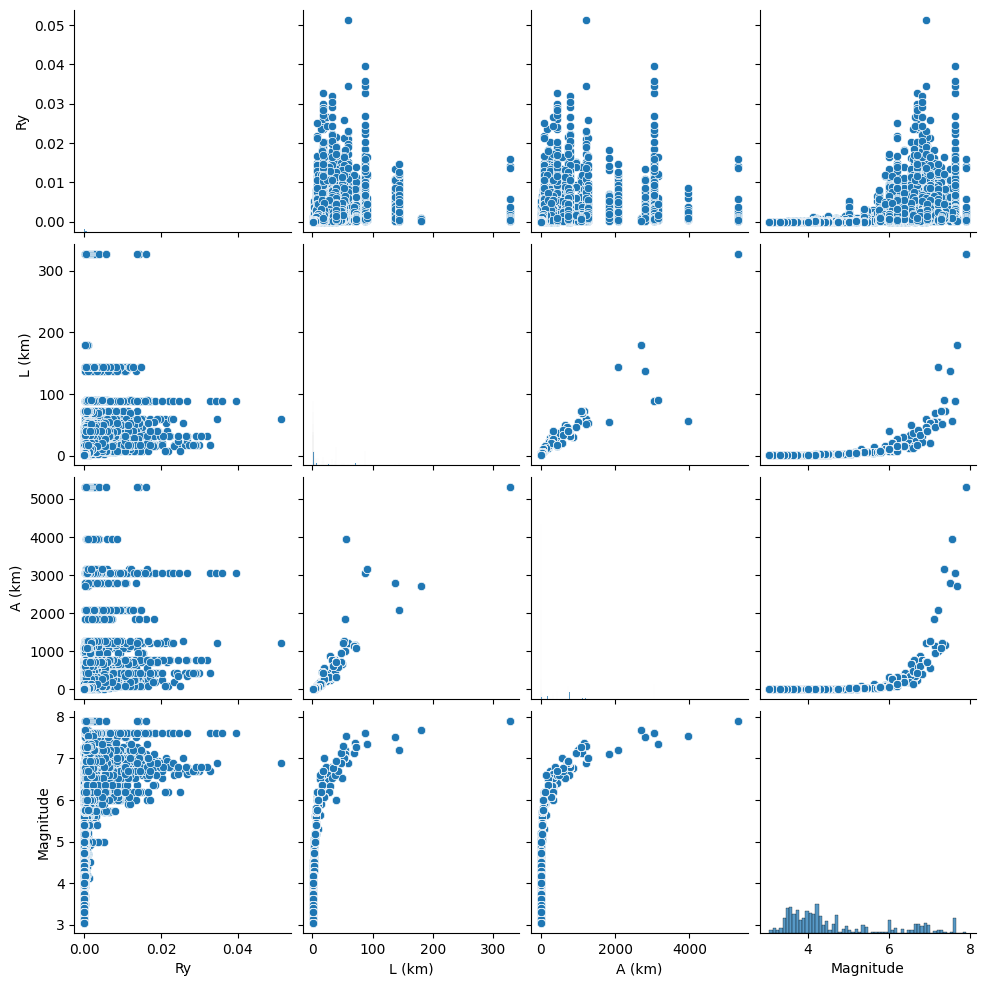

In [ ]:
sns.pairplot(df1[['Ry', 'L (km)', 'A (km)','Magnitude']])
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cd42330f-db8e-4ceb-ade1-2d5f297f211b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>